In [56]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix

In [48]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 9, 19)

df = web.DataReader("FB", "yahoo", start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-13,187.970001,186.539993,187.330002,187.190002,11441100,187.190002
2019-09-16,187.789993,185.770004,186.929993,186.220001,8444800,186.220001
2019-09-17,188.320007,185.539993,186.660004,188.080002,9671100,188.080002
2019-09-18,189.080002,186.009995,188.089996,188.139999,9681900,188.139999
2019-09-19,191.100006,188.149994,188.660004,190.139999,10392700,190.139999


This code displays data from Facebooks stock from January 2014 to September of 2019

# Rolling Mean & Return Rate Stocks

Rolling Mean(Moving Average) calculates a consistent average that smoothes out the price data by constantly creating an updated price
to avoid noise. It will follow the overall trend of the stocks and not deviate from its resistance point.

This will calculate the Moving Average for the last 100 windows (100 days) of stocks closing price and take the average for each of the window’s moving average. As you could see, The Moving Average steadily rises over the window and does not follow the jagged line of stocks price chart.

In [49]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg)

Date
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08         NaN
                ...   
2019-09-13    188.1086
2019-09-16    188.1450
2019-09-17    188.0932
2019-09-18    188.0597
2019-09-19    188.0133
Name: Adj Close, Length: 1439, dtype: float64


Lets overlay our moving average with our stock market chart with matplotlib

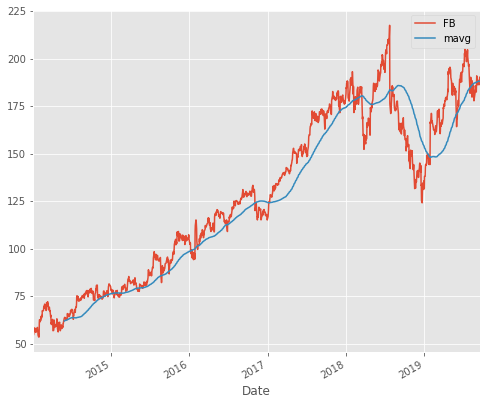

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='FB')
mavg.plot(label='mavg')
plt.legend()

The moving average makes the line smooth and does not show all the insignificant nuances in the stock pattern

# Return Deviation - to determine risk and return 

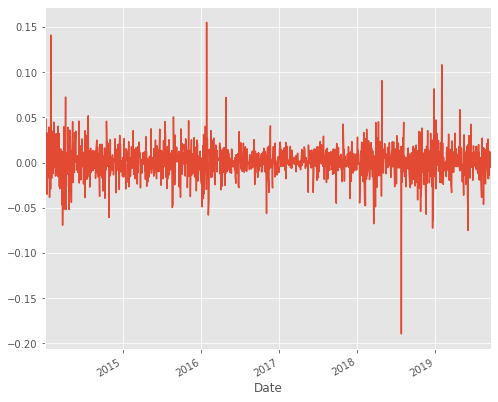

In [51]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

Our stock should return the best return possible. However, If you're risk averse then you might want to avoid the 
stock when it dropped in the middle of 2018

# Analysing Competitors

Lets compare big tech companies

In [52]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start=start, end=end)['Adj Close']
print(dfcomp)

Symbols           AAPL         GE         GOOG         IBM        MSFT
Date                                                                  
2014-01-02   71.320679  21.957794   554.481689  147.683655   32.582050
2014-01-03   69.754066  21.941826   550.436829  148.567215   32.362835
2014-01-06   70.134438  21.766165   556.573853  148.057816   31.678938
2014-01-07   69.632866  21.790121   567.303589  151.011002   31.924446
2014-01-08   70.073868  21.726240   568.484192  149.625931   31.354523
...                ...        ...          ...         ...         ...
2019-09-13  218.750000   9.340000  1239.560059  143.669998  137.320007
2019-09-16  219.899994   9.380000  1231.300049  142.479996  136.330002
2019-09-17  220.699997   9.360000  1229.150024  142.199997  137.389999
2019-09-18  222.770004   9.380000  1232.410034  142.220001  138.520004
2019-09-19  220.960007   9.420000  1238.709961  142.970001  141.070007

[1439 rows x 5 columns]


# Correlation Analysis-Does one competitor affect another?

In [53]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
print(corr)

Symbols      AAPL        GE      GOOG       IBM      MSFT
Symbols                                                  
AAPL     1.000000  0.279374  0.484696  0.373023  0.532306
GE       0.279374  1.000000  0.264148  0.365368  0.281127
GOOG     0.484696  0.264148  1.000000  0.403983  0.633869
IBM      0.373023  0.365368  0.403983  1.000000  0.474399
MSFT     0.532306  0.281127  0.633869  0.474399  1.000000


Lets plot Apple and Microsoft to view their return distributions

Text(0, 0.5, 'Returns MSFT')

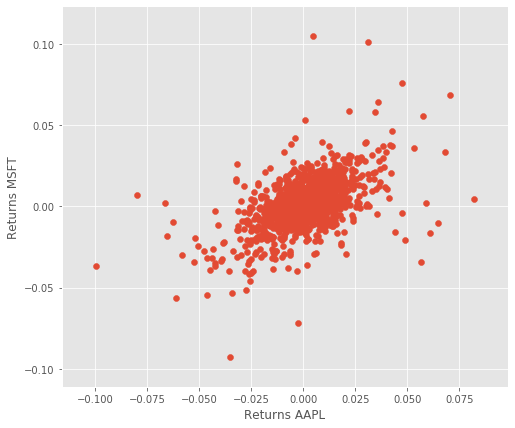

In [54]:
plt.scatter(retscomp.AAPL, retscomp.MSFT)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns MSFT')

This shows a positive correlation between Apple's and Microsofts returns. It seems like the high Apple's returns, the
higher Microsofts returns most of the time

Let us further improve our analysis by plotting the scatter_matrix to visualize possible correlations among competing 
stocks. At the diagonal point, we will run Kernel Density Estimate (KDE). 
KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data
sample. It helps generate estimations of the overall distributions.

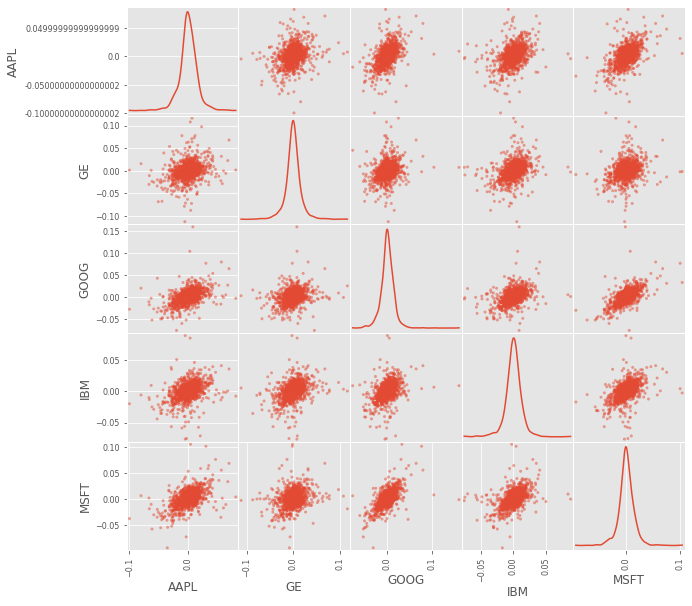

In [60]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

The distributions from the stocks are mainly positive. To prove the positive correlation we can use heatmaps!

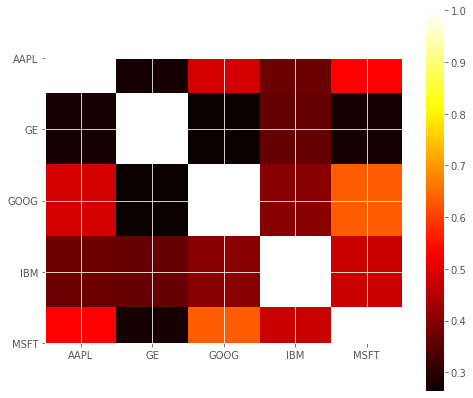

In [61]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

# Stocks Returns Rate and Risks

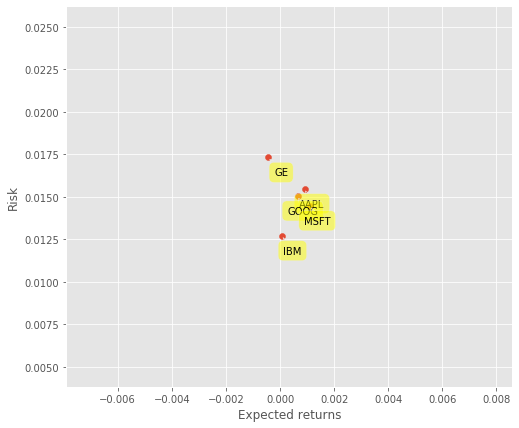

In [62]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Now you could view this neat chart of risk and return comparisons for competing stocks. Logically, you would like to minimize the risk and maximize returns. Hence, you would pick a line based off your risk tolerance and see what companies fit within that line.

# Predicting Stock Prices

## Feauture Engineering

The 3 ml algorithms we will use: KNearest Neighbors, A Neural Network, and Simple Linear Analysis

But first, let us engineer some features: High Low Percentage and Percentage Change

In [70]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
print(dfreg)

             Adj Close    Volume    HL_PCT  PCT_change
Date                                                  
2014-01-02   54.709999  43195500  1.882659   -0.218863
2014-01-03   54.560001  38246200  2.052791   -0.836058
2014-01-06   57.200001  68852600  5.611886    5.108421
2014-01-07   57.919998  77207400  2.296267    0.381278
2014-01-08   58.230000  56682400  2.026447    1.093752
...                ...       ...       ...         ...
2019-09-13  187.190002  11441100  0.763934   -0.074734
2019-09-16  186.220001   8444800  1.084733   -0.379817
2019-09-17  188.080002   9671100  1.478102    0.760740
2019-09-18  188.139999   9681900  1.631767    0.026585
2019-09-19  190.139999  10392700  1.551495    0.784478

[1439 rows x 4 columns]
